# MNIST example

In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.autograd import Variable

import torchvision
from torchvision import datasets, transforms

## MNIST data

In [2]:
transform = transforms.Compose([transforms.ToTensor()])
batch_size = 32

train_loader = torch.utils.data.DataLoader(
    datasets.MNIST('./data', train=True, download=False,
                   transform=transform),
    batch_size=batch_size)

test_loader = torch.utils.data.DataLoader(
    datasets.MNIST('./data', train=False, transform=transform),
    batch_size=batch_size)

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

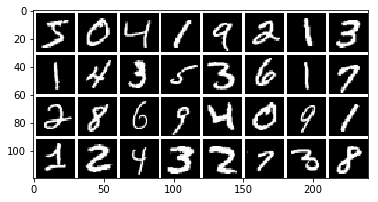

In [4]:
images,_ = next(iter(train_loader))
i = torchvision.utils.make_grid(images).numpy()
i = np.transpose(i,(1,2,0))
plt.imshow(i)

## Define model

In [17]:
model = nn.Sequential(nn.Linear(784,400),
                      nn.ReLU(),
                      nn.Linear(400,100),
                      nn.ReLU(),
                      nn.Linear(100,10))

## Setup optimization

In [20]:
train_op = optim.SGD(model.parameters(),lr=0.01)

## Training loop

In [21]:
for epoch in range(10):
    train_loss = []
    
    for _, (data, target) in enumerate(train_loader):
        data = Variable(data)
        target = Variable(target)
        
        predict = model(data.view(-1,784))
        loss = F.cross_entropy(predict , target)
        train_loss.append(loss.data[0])
        train_op.zero_grad()
        loss.backward()
        train_op.step()
    print "epoch:%s , train_loss:%s" % (epoch , np.mean(train_loss))

epoch:0 , train_loss:1.02179206761
epoch:1 , train_loss:0.36621855279
epoch:2 , train_loss:0.302875797512
epoch:3 , train_loss:0.264674272498
epoch:4 , train_loss:0.233233635573
epoch:5 , train_loss:0.206319047607
epoch:6 , train_loss:0.183584692716
epoch:7 , train_loss:0.164448272361
epoch:8 , train_loss:0.148400081855
epoch:9 , train_loss:0.13484253355


In [22]:
correct = 0
loss_ = []

for _, (data, target) in enumerate(test_loader):
    data = Variable(data)
    target = Variable(target)
        
    predict = model(data.view(-1,784))
    loss = F.cross_entropy(predict , target)
    loss_.append(loss.data[0])
    
    pred = predict.data.max(1)[1]
    correct += pred.eq(target.data).sum()

In [23]:
correct

9598